## ***Customer Review Sentiment Analysis for PNB Housing Finanace***

**Importing the Librarires**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
import time
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
from nltk.corpus import wordnet,stopwords
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn import svm
from sklearn.metrics import classification_report
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder 
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score ,log_loss, roc_auc_score,precision_recall_curve, recall_score,auc, precision_score,average_precision_score ,f1_score, classification_report , plot_roc_curve,plot_confusion_matrix,roc_curve,plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#reading the dataset
df=pd.read_csv('BankReviewsF1.csv',encoding='windows-1252')

Understanding the Data and the Dataset

In [ ]:
df.head()

,Date,Stars,Reviews,BankName
0,10-04-2017,5,"Great job, PNB Housing! Each person was profes...",PNB Housing Finance
1,10-02-2017,5,Matthew Richardson is professional and helpful...,PNB Housing Finance
2,21-08-2017,5,We had a past experience with PNB HousingMortg...,PNB Housing Finance
3,17-12-2017,5,We have been dealing with Brad Thomka from the...,PNB Housing Finance
4,27-05-2016,5,I can't express how grateful I am for the supp...,PNB Housing Finance


In [ ]:
df.describe()

,Stars
count,436.000000
mean,3.846330
std,1.570346
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      436 non-null    object
 1   Stars     436 non-null    int64 
 2   Reviews   436 non-null    object
 3   BankName  436 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.8+ KB


In [ ]:
df.shape

(436, 4)

In [ ]:
df.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

In [ ]:
obj1=df.select_dtypes(include=object).columns
obj1

Index(['Date', 'Reviews', 'BankName'], dtype='object')

In [ ]:
df['Stars'].value_counts()

5    248
1     78
4     55
3     29
2     26
Name: Stars, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


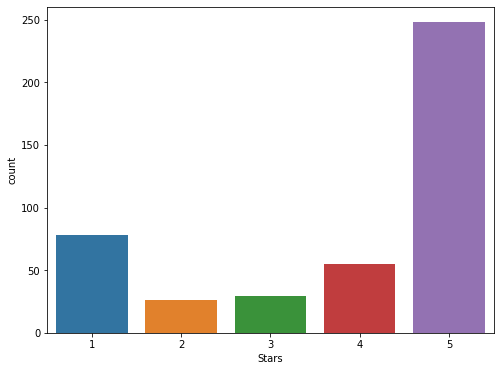

In [ ]:
#Plotting the graph for different stars
plt.figure(figsize=(8,6))
sns.countplot(df.Stars)
plt.show()

In [ ]:
X=df['Reviews']

In [ ]:
#User Defined Function to find Sentiment Polarity of the reviews 
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'  

In [ ]:
#Creating Dictionary that will contain both reviews and the sentiment of the reviews 
final_dictionary = []
for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(str(text))
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:51])

[{'Review': 'Great job, PNB Housing! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with PNB HousingMortgage and would without question use again and again if needed!! PNB Housingwent beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the PNB Housing Finance team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but wit

In [ ]:
# Finding positive reviews
positive_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Positive':
        positive_reviews.append(review)

# Finding neutral reviews
neutral_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_reviews.append(review)

# Finding negative reviews
negative_reviews = []
for review in final_dictionary:
    if review['Sentiment'] =='Negative':
        negative_reviews.append(review)

In [ ]:
#Counting number of positive,neutral and negative reviews
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])
reviews_count

,0
Positive,334
Neutral,12
Negative,90


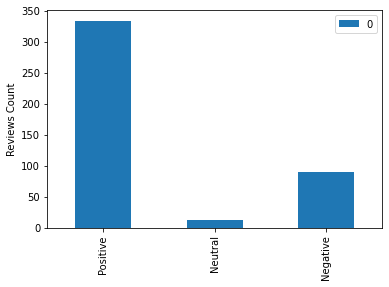

In [ ]:
#Plotting the count of different types of reviews
reviews_count.plot(kind='bar')
plt.ylabel('Reviews Count')   
plt.show()

In [ ]:
#Creating review-sentiment table
Data=final_dictionary
Review_Sentiment=pd.DataFrame(Data)
print(Review_Sentiment)

                                                Review Sentiment
0    Great job, PNB Housing! Each person was profes...  Positive
1    Matthew Richardson is professional and helpful...  Positive
2    We had a past experience with PNB HousingMortg...  Negative
3    We have been dealing with Brad Thomka from the...  Positive
4    I can't express how grateful I am for the supp...  Positive
..                                                 ...       ...
431  Very bad in service, just work for proccesing ...  Negative
432  I had applied for a home loan through online c...  Negative
433  I am not satisfied this bank and very poor ser...  Negative
434  The services are good with PNB Housing Finance...  Positive
435  They are not well equipped. Every time the req...  Positive

[436 rows x 2 columns]


In [ ]:
Reviews_Sentiment=pd.DataFrame(Data)
print(Reviews_Sentiment)
Reviews_Sentiment = Reviews_Sentiment[Reviews_Sentiment['Sentiment']!= "Neutral"] #removing neutral reviews
Reviews_Sentiment["Sentiment"].value_counts() #counting the number of positve and negastive reviews

                                                Review Sentiment
0    Great job, PNB Housing! Each person was profes...  Positive
1    Matthew Richardson is professional and helpful...  Positive
2    We had a past experience with PNB HousingMortg...  Negative
3    We have been dealing with Brad Thomka from the...  Positive
4    I can't express how grateful I am for the supp...  Positive
..                                                 ...       ...
431  Very bad in service, just work for proccesing ...  Negative
432  I had applied for a home loan through online c...  Negative
433  I am not satisfied this bank and very poor ser...  Negative
434  The services are good with PNB Housing Finance...  Positive
435  They are not well equipped. Every time the req...  Positive

[436 rows x 2 columns]


Positive    334
Negative     90
Name: Sentiment, dtype: int64

In [ ]:
rev_sent=pd.DataFrame(Data)
print(rev_sent)
rev_sent = rev_sent[rev_sent['Sentiment']!= "Neutral"] #removing the neutral reviews
rev_sent["Sentiment"].value_counts() #counting the number of positve and negastive reviews

                                                Review Sentiment
0    Great job, PNB Housing! Each person was profes...  Positive
1    Matthew Richardson is professional and helpful...  Positive
2    We had a past experience with PNB HousingMortg...  Negative
3    We have been dealing with Brad Thomka from the...  Positive
4    I can't express how grateful I am for the supp...  Positive
..                                                 ...       ...
431  Very bad in service, just work for proccesing ...  Negative
432  I had applied for a home loan through online c...  Negative
433  I am not satisfied this bank and very poor ser...  Negative
434  The services are good with PNB Housing Finance...  Positive
435  They are not well equipped. Every time the req...  Positive

[436 rows x 2 columns]


Positive    334
Negative     90
Name: Sentiment, dtype: int64

In [ ]:
Review_Sentiment["Sentiment"].value_counts() #counting the number of positve and negastive and nuetral reviews

Positive    334
Negative     90
Neutral      12
Name: Sentiment, dtype: int64

In [ ]:
Review_Sentiment = Review_Sentiment[Review_Sentiment['Sentiment']!= "Neutral"] #removing the neutral reviews
Review_Sentiment["Sentiment"].value_counts() #counting the number of positve and negastive reviews
sen=Reviews_Sentiment.Sentiment.factorize()
sen

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 

In [ ]:
#transform data i.e. converting sentiments into numerical value 

Review_Sentiment = Review_Sentiment.copy()
print("copy of dataset formed")

def label_transform(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)   #1 for Positive and 0 for Negative
  return Encoded_le

Review_Sentiment['Sentiment'] = label_transform(Review_Sentiment['Sentiment'])

Review_Sentiment




copy of dataset formed


,Review,Sentiment
0,"Great job, PNB Housing! Each person was profes...",1
1,Matthew Richardson is professional and helpful...,1
2,We had a past experience with PNB HousingMortg...,0
3,We have been dealing with Brad Thomka from the...,1
4,I can't express how grateful I am for the supp...,1
...,...,...
431,"Very bad in service, just work for proccesing ...",0
432,I had applied for a home loan through online c...,0
433,I am not satisfied this bank and very poor ser...,0
434,The services are good with PNB Housing Finance...,1


In [ ]:
Reviews_Sentiment['Sentiment'] = label_transform(Reviews_Sentiment['Sentiment'])

Reviews_Sentiment

,Review,Sentiment
0,"Great job, PNB Housing! Each person was profes...",1
1,Matthew Richardson is professional and helpful...,1
2,We had a past experience with PNB HousingMortg...,0
3,We have been dealing with Brad Thomka from the...,1
4,I can't express how grateful I am for the supp...,1
...,...,...
431,"Very bad in service, just work for proccesing ...",0
432,I had applied for a home loan through online c...,0
433,I am not satisfied this bank and very poor ser...,0
434,The services are good with PNB Housing Finance...,1


In [ ]:
Review_Sentiment =Review_Sentiment.sample(frac = 0.1, replace = False, random_state=42) #sampling data to get a randomized dataset 

In [ ]:
#Creating a fuction to clean the text data 

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
Review_Sentiment["Review"] = Review_Sentiment["Review"].apply(lambda x: clean_text(x))

Review_Sentiment



,Review,Sentiment
149,much happy loan process pnb housing finance ac...,1
287,good experience pnb home loan actually everyth...,1
180,apply home loan pnb housing finance limit late...,0
383,take home loan pnb process good representative...,1
432,apply home loan online channel explore option ...,0
74,take home loan pnb housing finance limit back ...,1
136,home loan application close pnb housing reason...,1
141,home loan application approve pnb housing loan...,1
30,jon barrett great asset husband make mortgage ...,1
73,housing loan experience good hassle free go br...,1


In [ ]:
Reviews_Sentiment =Reviews_Sentiment.sample(frac = 0.1, replace = False, random_state=42)  #sampling data to get a randomized dataset 
Reviews_Sentiment["Review"] = Reviews_Sentiment["Review"].apply(lambda x: clean_text(x)) #cleaning the review texts
Reviews_Sentiment


,Review,Sentiment
149,much happy loan process pnb housing finance ac...,1
287,good experience pnb home loan actually everyth...,1
180,apply home loan pnb housing finance limit late...,0
383,take home loan pnb process good representative...,1
432,apply home loan online channel explore option ...,0
74,take home loan pnb housing finance limit back ...,1
136,home loan application close pnb housing reason...,1
141,home loan application approve pnb housing loan...,1
30,jon barrett great asset husband make mortgage ...,1
73,housing loan experience good hassle free go br...,1


In [ ]:
# clean text data
rev_sent["Review"] = rev_sent["Review"].apply(lambda x: clean_text(x)) #cleaning the review texts
rev_sent

,Review,Sentiment
0,great job pnb housing person professional help...,Positive
1,matthew richardson professional helpful help f...,Positive
2,past experience pnb housingmortgage would with...,Negative
3,deal brad thomka beginning start stressful tim...,Positive
4,can't express grateful support zach provide fa...,Positive
...,...,...
431,bad service work proccesing fee firstly clear ...,Negative
432,apply home loan online channel explore option ...,Negative
433,satisfied bank poor service apply loane firstl...,Negative
434,service good pnb housing finance interest rate...,Positive


**Feature Engineering**

This is done using Vader i.e., part of the NLTK module
Vader returns 4 values:


*   a neutrality score

*   a positivity score
*   a negativity score


*   an overall score (compound) that summarizes the above scores



In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
Review_Sentiment["Sentiments"] = Review_Sentiment["Review"].apply(lambda x: sid.polarity_scores(x)) #giving polarity scores to the reviews 
Review_Sentiment= pd.concat([Review_Sentiment.drop(['Sentiments'], axis=1), Review_Sentiment['Sentiments'].apply(pd.Series)], axis=1) #adding the polarity score columns to the dataset
Review_Sentiment


,Review,Sentiment,neg,neu,pos,compound
149,much happy loan process pnb housing finance ac...,1,0.000,0.695,0.305,0.8481
287,good experience pnb home loan actually everyth...,1,0.079,0.671,0.251,0.7096
180,apply home loan pnb housing finance limit late...,0,0.066,0.830,0.104,0.2732
383,take home loan pnb process good representative...,1,0.000,0.442,0.558,0.9595
432,apply home loan online channel explore option ...,0,0.000,0.612,0.388,0.8860
74,take home loan pnb housing finance limit back ...,1,0.000,0.733,0.267,0.8442
136,home loan application close pnb housing reason...,1,0.064,0.738,0.198,0.6124
141,home loan application approve pnb housing loan...,1,0.000,0.723,0.277,0.8316
30,jon barrett great asset husband make mortgage ...,1,0.000,0.701,0.299,0.8555
73,housing loan experience good hassle free go br...,1,0.000,0.655,0.345,0.9022


In [ ]:
# add number of words column to cleaned reviews
Review_Sentiment["nb_words"] = Review_Sentiment["Review"].apply(lambda x: len(x.split(" ")))
Review_Sentiment

,Review,Sentiment,neg,neu,pos,compound,nb_words
149,much happy loan process pnb housing finance ac...,1,0.000,0.695,0.305,0.8481,24
287,good experience pnb home loan actually everyth...,1,0.079,0.671,0.251,0.7096,27
180,apply home loan pnb housing finance limit late...,0,0.066,0.830,0.104,0.2732,26
383,take home loan pnb process good representative...,1,0.000,0.442,0.558,0.9595,23
432,apply home loan online channel explore option ...,0,0.000,0.612,0.388,0.8860,22
74,take home loan pnb housing finance limit back ...,1,0.000,0.733,0.267,0.8442,28
136,home loan application close pnb housing reason...,1,0.064,0.738,0.198,0.6124,25
141,home loan application approve pnb housing loan...,1,0.000,0.723,0.277,0.8316,26
30,jon barrett great asset husband make mortgage ...,1,0.000,0.701,0.299,0.8555,25
73,housing loan experience good hassle free go br...,1,0.000,0.655,0.345,0.9022,27


Textual Reviews are converted to vectors using CountVectorizer which will help in WordCloud formation

In [ ]:
cv=CountVectorizer(stop_words='english')
cv_modified=cv.fit_transform(Review_Sentiment["Review"])
cv.get_feature_names()
cv_modified.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
cv_modified.toarray().shape
len(cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


335

In [ ]:
pd.DataFrame(cv_modified.toarray(),columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,account,accurate,acknowledgement,active,actually,adjust,agent,annum,application,...,web,website,week,willingness,woman,work,worst,wrong,year,zero
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Creating a dataframe which shows the count of occurance of each word
count_dataframe=pd.DataFrame(np.sum(cv_modified.toarray(),axis=0),cv.get_feature_names()).reset_index()
count_dataframe.columns=['Word','Count'] 
count_dataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word,Count
0,able,1
1,account,3
2,accurate,1
3,acknowledgement,1
4,active,1


In [ ]:
#Adding Sentiment Column with polarity of each word 
word_sentiment=[]
for word in count_dataframe['Word']:
  word_sentiment.append(sentiment_review(word))
count_dataframe['Sentiment']=word_sentiment
count_dataframe

,Word,Count,Sentiment
0,able,1,Positive
1,account,3,Neutral
2,accurate,1,Positive
3,acknowledgement,1,Neutral
4,active,1,Negative
...,...,...,...
330,work,1,Neutral
331,worst,1,Negative
332,wrong,1,Negative
333,year,9,Neutral


In [ ]:
#Separating positive words
neutral_words_df=count_dataframe.loc[count_dataframe['Sentiment']=='Neutral',:].sort_values('Count',ascending=False)
neutral_words_df

,Word,Count,Sentiment
175,loan,81,Neutral
218,pnb,40,Neutral
240,rate,36,Neutral
139,housing,35,Neutral
138,home,30,Neutral
...,...,...,...
187,market,1,Neutral
188,mention,1,Neutral
189,message,1,Neutral
190,minute,1,Neutral


**WordCloud Formation for Different Types of Words :-** 

*   Neutral Words
*   Positive Words 

*   Negative Words







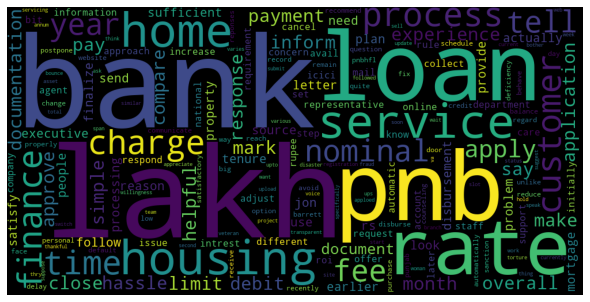

In [ ]:
#Plotting WordClod for most frequently used neutral words
wordcloud = WordCloud(width = 1000, height = 500,background_color = 'black').generate(' '.join(neutral_words_df.iloc[0:,0]))

#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
#Separating positive words
positive_words_df=count_dataframe.loc[count_dataframe['Sentiment']=='Positive',:].sort_values('Count',ascending=False)
positive_words_df

,Word,Count,Sentiment
128,good,25,Positive
136,high,9,Positive
119,fine,4,Positive
131,happy,3,Positive
129,great,3,Positive
222,pretty,3,Positive
121,fixed,2,Positive
266,satisfied,2,Positive
58,complete,2,Positive
238,quick,2,Positive


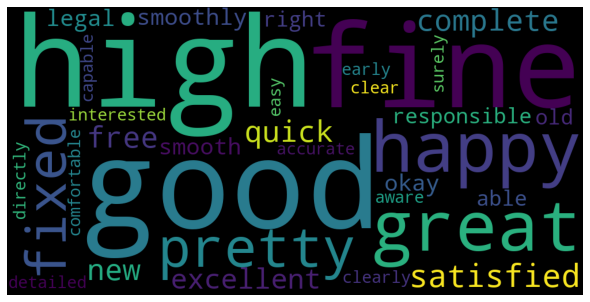

In [ ]:
#Plotting WordClod for 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500,background_color = 'black').generate(' '.join(positive_words_df.iloc[0:,0]))

#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
#Separating negative words
negative_words_df=count_dataframe.loc[count_dataframe['Sentiment']=='Negative',:].sort_values('Count',ascending=False)
negative_words_df

,Word,Count,Sentiment
22,bad,2,Negative
178,long,2,Negative
261,rude,2,Negative
4,active,1,Negative
27,base,1,Negative
79,difficult,1,Negative
109,extremely,1,Negative
167,late,1,Negative
174,limited,1,Negative
309,typically,1,Negative


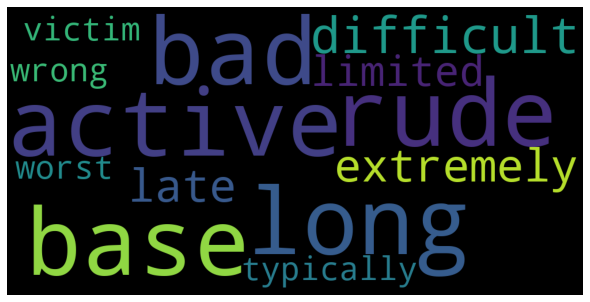

In [ ]:
#Plotting WordClod for most frequently used negative words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:,0]))

#Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Each text be transformed into numerical vectors using the word vectors (Doc2Vec)
# creating doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(Review_Sentiment["Review"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = Review_Sentiment["Review"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
Review_Sentiment = pd.concat([Review_Sentiment, doc2vec_df], axis=1)
Review_Sentiment

,Review,Sentiment,neg,neu,pos,compound,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
149,much happy loan process pnb housing finance ac...,1,0.000,0.695,0.305,0.8481,24,0.069632,-0.036187,-0.013409,0.036297,-0.022319
287,good experience pnb home loan actually everyth...,1,0.079,0.671,0.251,0.7096,27,0.046885,0.040460,-0.063813,-0.068927,0.000727
180,apply home loan pnb housing finance limit late...,0,0.066,0.830,0.104,0.2732,26,0.027243,0.051211,0.042687,0.033012,-0.105996
383,take home loan pnb process good representative...,1,0.000,0.442,0.558,0.9595,23,-0.000318,-0.005294,0.085689,0.030880,-0.086523
432,apply home loan online channel explore option ...,0,0.000,0.612,0.388,0.8860,22,0.071739,-0.080595,0.053022,-0.103527,0.047212
74,take home loan pnb housing finance limit back ...,1,0.000,0.733,0.267,0.8442,28,-0.055482,0.073306,0.020106,-0.028391,0.007971
136,home loan application close pnb housing reason...,1,0.064,0.738,0.198,0.6124,25,-0.052757,-0.088505,-0.075740,-0.108419,-0.014202
141,home loan application approve pnb housing loan...,1,0.000,0.723,0.277,0.8316,26,0.026860,-0.026228,-0.013346,-0.048189,0.035118
30,jon barrett great asset husband make mortgage ...,1,0.000,0.701,0.299,0.8555,25,0.046737,0.067436,-0.035337,-0.054134,0.018322
73,housing loan experience good hassle free go br...,1,0.000,0.655,0.345,0.9022,27,-0.085204,0.012628,0.096469,0.081222,-0.119369


In [ ]:
# add tf-idfs columns
# TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. 
# The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(Review_Sentiment["Review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = Review_Sentiment.index
Review_Sentiment = pd.concat([Review_Sentiment, tfidf_df], axis=1)
Review_Sentiment

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Review,Sentiment,neg,neu,pos,compound,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,...,word_home,word_housing,word_interest,word_loan,word_pnb,word_process,word_rate,word_service,word_take,word_time
149,much happy loan process pnb housing finance ac...,1,0.000,0.695,0.305,0.8481,24,0.069632,-0.036187,-0.013409,...,0.000000,0.224466,0.208478,0.336879,0.208478,0.524695,0.213629,0.000000,0.000000,0.000000
287,good experience pnb home loan actually everyth...,1,0.079,0.671,0.251,0.7096,27,0.046885,0.040460,-0.063813,...,0.207248,0.000000,0.000000,0.432275,0.178342,0.224425,0.000000,0.218452,0.000000,0.000000
180,apply home loan pnb housing finance limit late...,0,0.066,0.830,0.104,0.2732,26,0.027243,0.051211,0.042687,...,0.658113,0.304878,0.141581,0.343171,0.283162,0.000000,0.145079,0.000000,0.000000,0.000000
383,take home loan pnb process good representative...,1,0.000,0.442,0.558,0.9595,23,-0.000318,-0.005294,0.085689,...,0.395083,0.000000,0.169990,0.274687,0.339980,0.213915,0.174190,0.624664,0.246938,0.000000
432,apply home loan online channel explore option ...,0,0.000,0.612,0.388,0.8860,22,0.071739,-0.080595,0.053022,...,0.339334,0.000000,0.292006,0.235926,0.000000,0.000000,0.299221,0.715358,0.000000,0.000000
74,take home loan pnb housing finance limit back ...,1,0.000,0.733,0.267,0.8442,28,-0.055482,0.073306,0.020106,...,0.226689,0.210032,0.195072,0.472825,0.195072,0.245478,0.199891,0.238944,0.283373,0.000000
136,home loan application close pnb housing reason...,1,0.064,0.738,0.198,0.6124,25,-0.052757,-0.088505,-0.075740,...,0.487293,0.225744,0.209665,0.338797,0.209665,0.000000,0.214845,0.256819,0.000000,0.359594
141,home loan application approve pnb housing loan...,1,0.000,0.723,0.277,0.8316,26,0.026860,-0.026228,-0.013346,...,0.200788,0.186034,0.172784,0.279201,0.172784,0.217430,0.177052,0.211643,0.250995,0.592680
30,jon barrett great asset husband make mortgage ...,1,0.000,0.701,0.299,0.8555,25,0.046737,0.067436,-0.035337,...,0.000000,0.000000,0.000000,0.788977,0.000000,0.614423,0.000000,0.000000,0.000000,0.000000
73,housing loan experience good hassle free go br...,1,0.000,0.655,0.345,0.9022,27,-0.085204,0.012628,0.096469,...,0.000000,0.242274,0.225018,0.181803,0.000000,0.283161,0.000000,0.275625,0.326874,0.385926


In [ ]:
# show sentiment distribution
Review_Sentiment["Sentiment"].value_counts(normalize = True) #1 for Positive and 0 for Negative

1    0.738095
0    0.261905
Name: Sentiment, dtype: float64

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
Review_Sentiment[Review_Sentiment["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
383,take home loan pnb process good representative...,0.558
374,approach pnb home loan rate interest satisfact...,0.456
76,take home loan pnb housing finance limit long ...,0.447
56,get great response pnb housing fine interest r...,0.440
77,earlier loan pnb switch icici rate interest re...,0.426
432,apply home loan online channel explore option ...,0.388
73,housing loan experience good hassle free go br...,0.345
55,process get home loan pnbhfl quite good experi...,0.340
366,process good pnb housing finance customer serv...,0.326
198,take one home loan pnb housing finance last on...,0.324


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
Review_Sentiment[Review_Sentiment["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

,Review,neg
359,big fraud company cheat people take mortihage ...,0.398
91,avail home loan interest rate typically high s...,0.235
95,one interested take loan pnb finance limit pls...,0.164
214,worst housing finance customer care bank execu...,0.154
80,process get home loan pnbhfl difficult lot has...,0.144
349,look home loan pnb housing finance limit amoun...,0.137
238,reduce interest rate upto overall documentatio...,0.118
254,recently apply housing loan pnb housing financ...,0.104
39,close process va loan go smoothly loan service...,0.087
189,process fee home loan communicate different di...,0.082


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


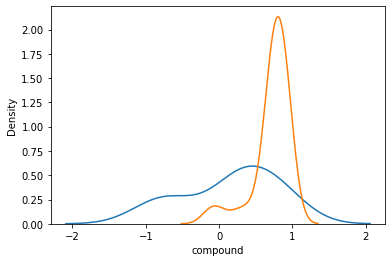

In [ ]:
# plot sentiment distribution for positive and negative reviews

for x in [0, 1]:
    subset = Review_Sentiment[Review_Sentiment['Sentiment'] == x]
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

**Modelling the Dataset**

Features are chosen that will be used to train the different models applied. Then we split our data into two parts:


*   one to train our model

*   one to assess its performances






In [ ]:
# feature selection
label = "Sentiment"
ignore_cols = [label, "Review", ]
features = [c for c in Review_Sentiment.columns if c not in ignore_cols]

# split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(Review_Sentiment[features], Review_Sentiment[label], train_size = 0.20, random_state = 42)

**Applying Different Classification Algorithms**

*   Logistic Regression
*   Random Forest 
*   Naive Bayes 
*   K Nearest Neighbour (KNN)
*   Spport Vector Machine (SVM) 




a) Applying Logistic Regression Algorithm 

In [ ]:
#creating the model and training it
clf= LogisticRegression(penalty='none')
clf.fit(X_train,Y_train)

LogisticRegression(penalty='none')

In [ ]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
Y_test[:50]

366    1
91     0
30     1
56     1
432    0
374    1
238    1
80     0
339    1
136    1
305    1
324    1
254    1
73     1
428    1
200    1
9      1
224    1
189    0
149    1
55     1
74     1
95     1
76     1
287    1
119    0
246    1
180    0
214    0
77     1
383    1
39     0
234    1
349    1
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


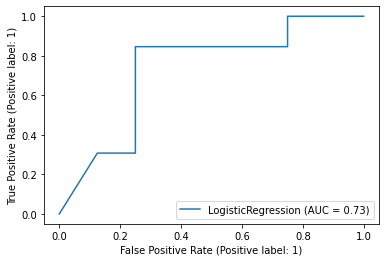

In [ ]:
plot_roc_curve(clf,X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


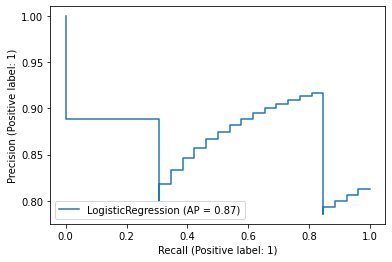

In [ ]:
plot_precision_recall_curve(clf, X_test, Y_test)

In [ ]:
#Analyzing Logistic Regression model applied
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

print('Log loss = {:.5f}'.format(log_loss(Y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(Y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(Y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(Y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(Y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(Y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(Y_test, test_pred)))

print('\nClassification Report')
print(classification_report(Y_test, test_pred))

Log loss = 6.07239
AUC = 0.73077
Average Precision = 0.87035

Using 0.5 as threshold:
Accuracy = 0.76471
Precision = 0.90909
Recall = 0.76923
F1 score = 0.83333

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.91      0.77      0.83        26

    accuracy                           0.76        34
   macro avg       0.70      0.76      0.72        34
weighted avg       0.81      0.76      0.78        34



Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


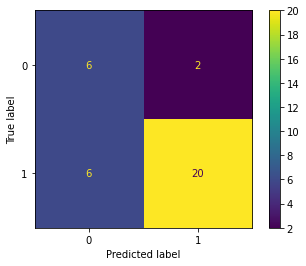

In [ ]:
#plotting confusion matrix
print('Confusion Matrix')
plot_confusion_matrix(clf, X_test, Y_test)

b) Applyting Random Forest Algorithm 

In [ ]:
# creating and training a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
a=accuracy_score(Y_test,rf.predict(X_test))
a

0.7647058823529411

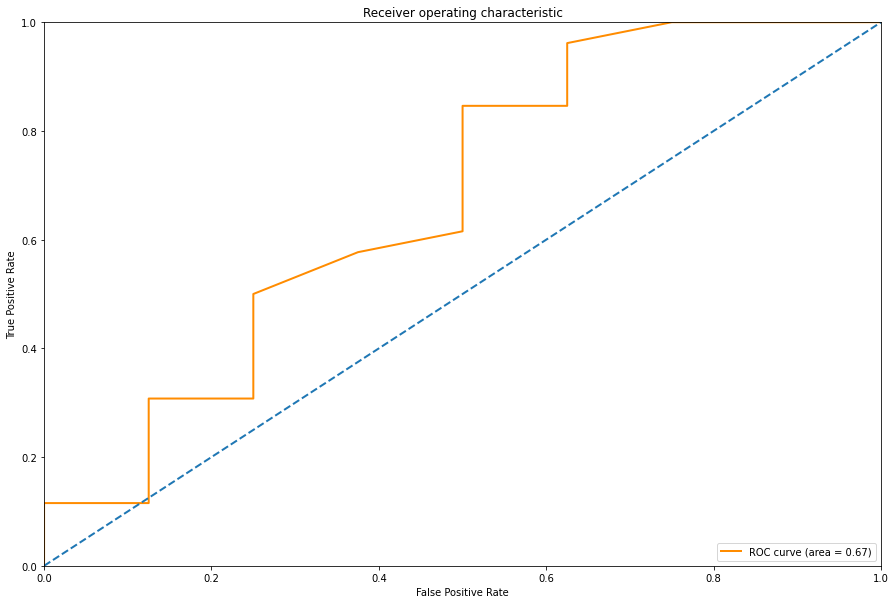

In [ ]:
# Reciever Operating Characteristic curve to summarize the quality of the classifier

Y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

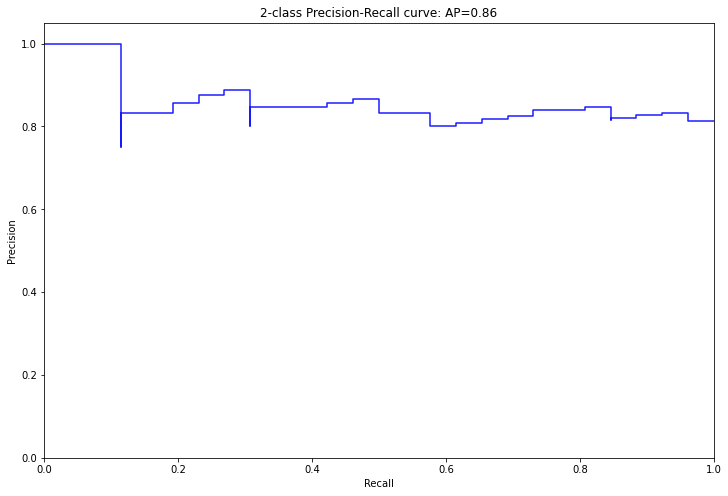

In [ ]:
# Precision-Recall curve

average_precision = average_precision_score(Y_test, Y_pred)

precision, recall, _ = precision_recall_curve(Y_test, Y_pred)

plt.figure(1, figsize = (12, 8))
plt.step(recall, precision, color='b', alpha=0.9,
         where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

c) Applying Naive Bayes Algorithm 

In [ ]:
#building and training Naive Bayes Algorithm
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
Y_test

366    1
91     0
30     1
56     1
432    0
374    1
238    1
80     0
339    1
136    1
305    1
324    1
254    1
73     1
428    1
200    1
9      1
224    1
189    0
149    1
55     1
74     1
95     1
76     1
287    1
119    0
246    1
180    0
214    0
77     1
383    1
39     0
234    1
349    1
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
ac=(accuracy_score(Y_test,y_pred))
print('Accuracy Score = {:.5f}'.format(ac))

Accuracy Score = 0.55882


In [ ]:
cm

array([[ 1,  7],
       [ 8, 18]])

Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


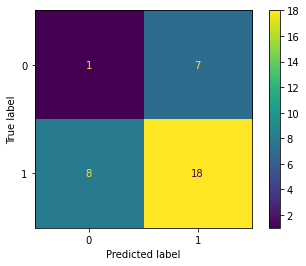

In [ ]:
#plotting confusion matrix
print('Confusion Matrix')
plot_confusion_matrix(classifier,X_test,Y_test)

d) Applying KNN Algorithm

In [ ]:
# Building and training the  KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier1= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier1.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
y_pred1= classifier1.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
Y_test

366    1
91     0
30     1
56     1
432    0
374    1
238    1
80     0
339    1
136    1
305    1
324    1
254    1
73     1
428    1
200    1
9      1
224    1
189    0
149    1
55     1
74     1
95     1
76     1
287    1
119    0
246    1
180    0
214    0
77     1
383    1
39     0
234    1
349    1
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred1)
ac1 = accuracy_score(Y_test,y_pred1)
cm

array([[ 0,  8],
       [ 0, 26]])

Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


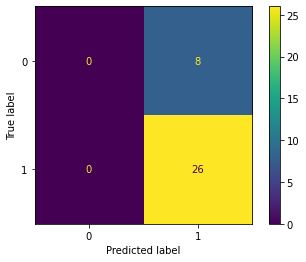

In [ ]:
#plotting confusion matrix
print('Confusion Matrix')
plot_confusion_matrix(classifier1, X_test, Y_test)

In [ ]:
print('Accuracy Score = {:.5f}'.format(ac1))

Accuracy Score = 0.76471


In [ ]:
np.random.seed(500) #this is done so that we run the program again and again the original input values are maintained.

rev_sent.dropna(inplace=True) #removing all empty spaces

# Change all the text to lower case.
#Python interprets ‘car’ and ‘CARS’ differently.I have not used stemming in this program but the process is simple and can be done by using in built functions like “ntlk”.
rev_sent['Review'] = [entry.lower() for entry in rev_sent['Review']]

#this step step divides the positive as 1 and negative as 0 this could have been done by label encoder but my train_y array is 1 d
rev_sent['Sentiment'] = np.where(rev_sent['Sentiment'].str.contains('Positive'), 1, 0) 

#splitting the data set as training and testing sets in 70:30 ratio
Train_X, Test_X, Train_Y, Test_Y = train_test_split(rev_sent['Review'],rev_sent['Sentiment'],test_size=0.3) 
print(Train_X.shape,Train_Y.shape)#this helps to view the number of rows in the data set

(296,) (296,)


In [ ]:
Encoder = LabelEncoder() #this is used so that all the entries of Y is properly divided as 1 and 0
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

#tfidf feature extraction using the function
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectorizer.fit_transform(rev_sent['Review'])

#values of tfidf for train data and test data
Train_X_Tfidf = vectorizer.transform(Train_X)
Test_X_Tfidf = vectorizer.transform(Test_X)
print(Train_X_Tfidf)

  (0, 324)	0.39199482160874544
  (0, 321)	0.4247331647124478
  (0, 284)	0.29752012240768827
  (0, 236)	0.3360282544128281
  (0, 226)	0.13882658743018533
  (0, 190)	0.33166272158345844
  (0, 141)	0.12588009070988612
  (0, 134)	0.323581714020239
  (0, 122)	0.36230373406820005
  (0, 29)	0.17638682212568085
  (0, 18)	0.22871024405049795
  (1, 328)	0.20396500029238973
  (1, 320)	0.2417967904157095
  (1, 280)	0.23924889748477093
  (1, 278)	0.10822518241876175
  (1, 275)	0.2238411974229671
  (1, 232)	0.2417967904157095
  (1, 221)	0.2711319304191338
  (1, 217)	0.1390202572498324
  (1, 215)	0.2238411974229671
  (1, 151)	0.24445313638791133
  (1, 143)	0.0935677375525209
  (1, 142)	0.3103663573130566
  (1, 141)	0.09730626266145555
  (1, 130)	0.18118911179749186
  :	:
  (294, 130)	0.12035965136050968
  (294, 116)	0.2961605673963946
  (294, 115)	0.1301201841435127
  (294, 29)	0.15335340308348913
  (294, 17)	0.21373861121924462
  (295, 316)	0.24313513506106252
  (295, 308)	0.12026674131519106
  (295

d) Applying SVM Algorithm

In [ ]:
#Building the SVM algorithm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score:",accuracy_score(predictions_SVM, Test_Y))


SVM Accuracy Score: 0.859375


In [ ]:
#Analyzing the SVM algorithm model applied
auc = roc_auc_score(Test_Y, predictions_SVM)
acc = accuracy_score(Test_Y, predictions_SVM)
f1 = f1_score(Test_Y, predictions_SVM)
prec = precision_score(Test_Y, predictions_SVM)
rec = recall_score(Test_Y, predictions_SVM)
result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
for i in result :
  print(i,":",result[i])

auc : 0.6551456310679611
f1 : 0.9189189189189189
acc : 0.859375
precision : 0.8571428571428571
recall : 0.9902912621359223


**Text Classifier Model using LSTM :-** 

We build a text classifier using Long Short Term Memory Networks(LSTM) layers that work well with time series data.In this, it stores the meaning of every word and its calculations for such sequential data.

In [ ]:
#applying tokenizer method to reviews
rev = Review_Sentiment.Review.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(rev)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(rev)
padded_sequence = pad_sequences(encoded_docs, maxlen=200) #padding the sentences to have equal length

#training the sentiment analysis model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25)) 
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2)) #using dropout function to avoid overfitting 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

#splitting the data using validation split and then training the model
history = model.fit(padded_sequence,sen[0],validation_split=0.2, epochs=5, batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           12736     
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 29,387
Trainable params: 29,387
Non-trainable params: 0
____________________________________________________

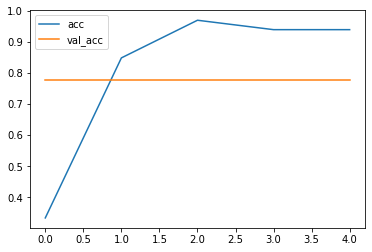

In [ ]:
# Plot for Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()


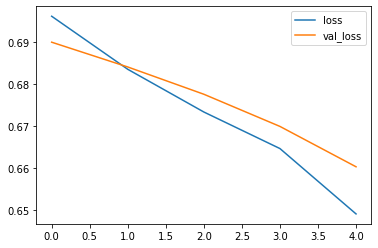

In [ ]:
# Plot for Loss and Validation Loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

**Predicting The Sentiment of User Given Reviews :-**

Since SVM Algorithm has the highest accuracy on the test set so it will be used for this dynamic prediction.




In [ ]:
#function to enter an input sentence and check the classificcation as positive or negative 
lst=[]
print ("Enter Sentences:") #taking inputs from the user
for i in range(0,2):
  ele = input()
  lst.append(ele)


tes=vectorizer.transform(lst)
#print(tes)
predictions= SVM.predict(tes)
#print(predictions)
for i in predictions:
        if predictions[i] == 0 :
            print("---- positive")
        else:
            print("---- negative")


Enter Sentences:
Executives are not trustable and untrained . Completely misguide to the customer . Better to compare every bank offer and and analyse. Better to avoid home loan from pnbhfl . Lots of hidden things , they never tell you . Unnecessarily mentally harassed to the customer . Experience is very bad
I have taken Home loan directly through PNB Housing Finance Ltd.I have got all the relevant details about the loan process .The rate of interest and the processing fee was nominal as well .I have got the loan amount sanctioned on time and it was sufficient as well .I am completely satisfied with the service .
---- negative
---- positive
